# Notes on rebasing an index
## based on CPI data from world bank

The problem is, that I only get approximate values when simply idviding by the value of interest. 

See example: 

2000    120  --  115  114.285
2005    105 -15  100  
2010    90  -15   85  85.714

The absolute difference in the above example is in full integers, 115, however when dividing by the value of interest from 2005 (=105) then only an approximate value is calculated e.g. 85.715 instead of 85. 

# import data

### Japan

In [1]:
import pandas as pd

In [2]:
exp_gdp = pd.read_csv("EXP-GDP/API_NE.EXP.GNFS.ZS_DS2_en_csv_v2_431603.csv",skiprows=3,delimiter=",")
exp_gdp.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,72.852913,71.820435,72.548690,72.252774,73.234592,55.32681,69.069709,83.124605,NaN,NaN
1,Africa Eastern and Southern,AFE,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,24.046024,23.249929,23.824897,25.315921,23.903124,22.03616,25.922406,27.595354,24.50316,NaN


In [3]:
# % share of Exports over GDP on a YEARLY basis // starting from 1960 to 2023
print(exp_gdp[exp_gdp["Country Code"] == "JPN"].columns)

exp_gdp_ss = exp_gdp[exp_gdp["Country Code"].isin(["JPN","USA"]) ].drop(
    ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 68'],axis=1).T.rename(
    columns={119:'jpn_exp_gdp',251:'usa_exp_gdp'})
print(len(exp_gdp_ss))
print(exp_gdp_ss.head(2))
print(exp_gdp_ss.tail(2))

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')
64
      jpn_exp_gdp  usa_exp_gdp
1960          NaN          NaN
1961          NaN          NaN
      jpn_exp_gdp  usa_exp_gdp
2022    21.541723    11.633909
2023          NaN          NaN


### USD YEN FX Rate

In [4]:
# DAILY basis
usd_yen = pd.read_csv("FX-Rate-USD-YEN/dollar-yen-exchange-rate-historical-chart.csv",skiprows=15)
print(len(usd_yen))
print(usd_yen.head(2))

13784
         date   value
0  1971-01-04  357.73
1  1971-01-05  357.81


In [5]:
usd_yen["month"] = pd.to_datetime(usd_yen.date).dt.month
usd_yen["year"] = pd.to_datetime(usd_yen.date).dt.year
usd_yen.head(2)

,date,value,month,year
0,1971-01-04,357.73,1,1971
1,1971-01-05,357.81,1,1971


In [6]:
# YEARLY: 1970 to 2023
usd_yen_yearly = usd_yen.groupby("year").mean("value")
print(len(usd_yen_yearly))
print(usd_yen_yearly.head(2))
print(usd_yen_yearly.tail(2))

54
          value     month
year                     
1971  347.78569  6.456067
1972  303.12498  6.438247
           value     month
year                      
2023  140.734001  6.677019
2024  150.839595  2.765432


### JPN CPI (from World Bank, hence "wb")

In [7]:
# CPI from the world bank on a YEARLY basis // 1960 to 2022 // BASE = 2010

#jpn_cpi = pd.read_csv("JPN-CPI/API_FP.CPI.TOTL_DS2_en_csv_v2_527528-PERC-CHANGE/API_FP.CPI.TOTL_DS2_en_csv_v2_527528.csv",skiprows=3,delimiter=",")
jpn_cpi = pd.read_csv("JPN-CPI/API_FP.CPI.TOTL_DS2_en_csv_v2_1584217.csv",skiprows=3,delimiter=",")

# _wb = WORLD BANK

cpi_wb_ss = jpn_cpi[jpn_cpi["Country Code"].isin(["JPN","USA"]) ].drop(
    ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','Unnamed: 68'],axis=1).T.rename(
    columns={119:'jpn_cpi_wb',251:'usa_cpi_wb'})

print(len(cpi_wb_ss))
print(cpi_wb_ss.head(2))
print(cpi_wb_ss.tail(2))

64
      jpn_cpi_wb  usa_cpi_wb
1960   18.972569   13.563061
1961   19.991104   13.708284
      jpn_cpi_wb  usa_cpi_wb
2022  107.839691  134.211206
2023  111.364036  139.735794


##### try us labour statistics example

In [12]:
cpi_wb_ss.loc["2000",["jpn_cpi_wb","usa_cpi_wb"]]

jpn_cpi_wb    102.667615
usa_cpi_wb     78.970721
Name: 2000, dtype: float64

In [61]:
cpi_wb_base_2000 = (cpi_wb_ss/cpi_wb_ss.loc["2000",["jpn_cpi_wb","usa_cpi_wb"]]) *100
print(cpi_wb_base_2000.diff().sum())
print(cpi_wb_ss.diff().sum())

jpn_cpi_wb     89.990858
usa_cpi_wb    159.771535
dtype: float64
jpn_cpi_wb     92.391467
usa_cpi_wb    126.172733
dtype: float64


### offset rebased time series by difference in the differences of the series
as it seems there is a rounding error in the rebased index

What I have tried at this point: 
- tutorial by office of labour statistics (us): https://www.bls.gov/cpi/factsheets/rebasing.htm
  - However, this in theory also leads to to just a time series that got divided by, in this case, the january 2015 index value (see chat gpt for the corresponding example)
  - or just try to divide any index number by january 2015 value

therefore, as it seems there is an round error issue here, since I have no other explanation

<Axes: >

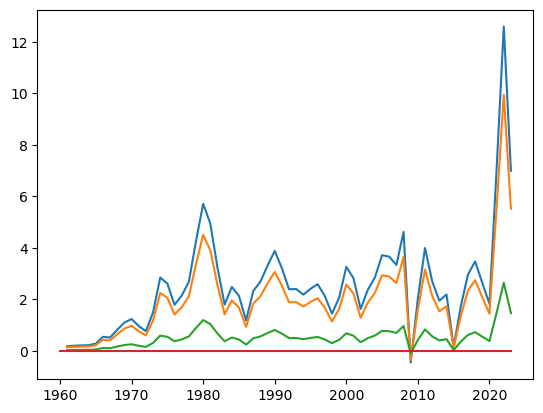

In [80]:
import numpy as np
cpi_wb_base_2000["zeros"] = np.zeros(len(cpi_wb_ss))

cpi_wb_base_2000["usa_cpi_wb"].diff().plot()
cpi_wb_ss["usa_cpi_wb"].diff().plot()
(cpi_wb_base_2000["usa_cpi_wb"].diff() - cpi_wb_ss["usa_cpi_wb"].diff()).plot()
cpi_wb_base_2000["zeros"].plot()

# looking at the figure below, it seems that the offset should be deducted from the base_2000 series, since the difference 
# is always positive

theoretically when deducting the difference of the differences from the "cpi_wb_base_2000" series, the differences should be gone. 

However, looking at the figure below, the differences (in green) are still not zero. 

In [112]:
# this is the offset time series
cpi_wb_base_2000_ = cpi_wb_base_2000 - (cpi_wb_base_2000.diff().shift(-1) - cpi_wb_ss.diff().shift(-1))


<Axes: >

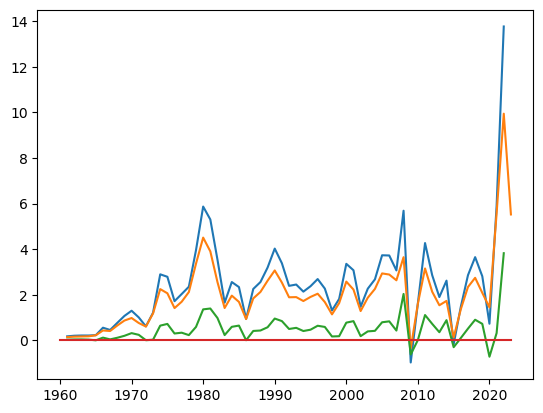

In [113]:
cpi_wb_base_2000_["usa_cpi_wb"].diff().plot()
cpi_wb_ss["usa_cpi_wb"].diff().plot()
(cpi_wb_base_2000_["usa_cpi_wb"].diff() - cpi_wb_ss["usa_cpi_wb"].diff()).plot()
(cpi_wb_base_2000["zeros"]-100).plot()



1960         NaN
1961    0.038672
1962    0.043760
1963    0.045795
1964    0.047831
          ...   
2019    0.555723
2020    0.385140
2021    1.484821
2022    2.648220
2023    1.471154
Name: usa_cpi_wb, Length: 64, dtype: float64

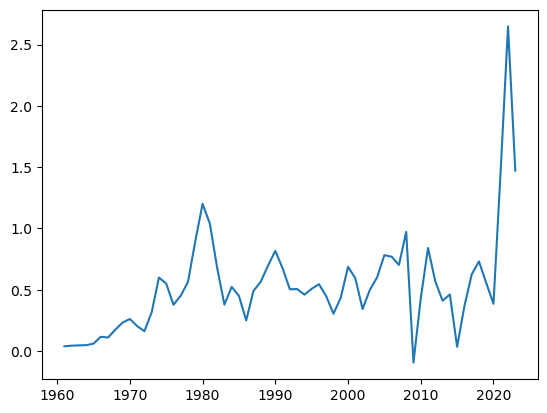

In [121]:
diffs_of_diffs=(cpi_wb_base_2000["usa_cpi_wb"].diff()-cpi_wb_ss["usa_cpi_wb"].diff())
diffs_of_diffs.plot()
#diffs_of_diffs

In [132]:
# Notes for a chat gpt question

pd.DataFrame([cpi_wb_ss["usa_cpi_wb"][1:10],cpi_wb_base_2000["usa_cpi_wb"][1:10],
 cpi_wb_ss["usa_cpi_wb"].diff()[1:10],cpi_wb_base_2000["usa_cpi_wb"].diff()[1:10],
(cpi_wb_ss["usa_cpi_wb"].diff()[1:10] - cpi_wb_base_2000["usa_cpi_wb"].diff()[1:10]),
]).T

,usa_cpi_wb,usa_cpi_wb,usa_cpi_wb,usa_cpi_wb,usa_cpi_wb
1961,13.708284,17.358691,0.145223,0.183895,-0.038672
1962,13.872615,17.566783,0.164331,0.208091,-0.043760
1963,14.044590,17.784553,0.171975,0.217770,-0.045795
1964,14.224207,18.012002,0.179618,0.227449,-0.047831
1965,14.449685,18.297522,0.225478,0.285521,-0.060043
1966,14.885354,18.849206,0.435669,0.551684,-0.116015
1967,15.298093,19.371854,0.412739,0.522648,-0.109909
1968,15.951596,20.199381,0.653503,0.827526,-0.174023
1969,16.822934,21.302749,0.871338,1.103368,-0.232030
